# E2. SLAM

### Define all the imports
Import all the dependencies required to launch the notebook

In [1]:
# Import main dependencies
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change to main repo folder for the imports
_, dir = os.path.split(os.getcwd())
if dir == 'notebooks': 
    os.chdir('..')
    sys.path.append(os.getcwd())
# Ignore warnings from pandas
pd.set_option('mode.chained_assignment', None)

In [3]:
# Import methods from our local library
from src.EKF_SLAM.EKF_SLAM_known_correspondences import ExtendedKalmanFilterSLAM as EKF_SLAM_known
from src.EKF_SLAM.EKF_SLAM_unknown_correspondences import ExtendedKalmanFilterSLAM as EKF_SLAM_unknown

from src.fast_SLAM_1.Fast_SLAM_1_known_correspondences import FastSLAM1 as FastSLAM
from src.fast_SLAM_1.lib import MotionModel as FS_MotionModel
from src.fast_SLAM_1.lib import MeasurementModel as FS_MeasurementModel

from src.graph_SLAM.Graph_SLAM_known_correspondences import GraphSLAM

### Set dataset

In [4]:
# Define dataset to read
dataset = "data/MRCLAM_Dataset1"
robot = 'Robot3' # Robot
start_frame = 2000
end_frame = 6000

### T1. EKF SLAM
Review the EKF_SLAM() method, execute the EKF SLAM of the next code blocks and answer the questions

#### EKF SLAM with unknown correspondences

In [ ]:
# State covariance matrix
R = np.diagflat(np.array([5.0, 5.0, 100.0])) ** 2
# Measurement covariance matrix
Q = np.diagflat(np.array([300.0, 300.0, 1e16])) ** 2
ekf_slam_unknown = EKF_SLAM_unknown(dataset, robot, start_frame, end_frame, R, Q, plot=True, plot_inter=True)

#### EKF SLAM with known correspondences

In [ ]:
# State covariance matrix
R = np.diagflat(np.array([5.0, 5.0, 100.0])) ** 2
# Measurement covariance matrix
Q = np.diagflat(np.array([300.0, 300.0, 1e16])) ** 2
ekf_slam_known = EKF_SLAM_known(dataset, robot, start_frame, end_frame, R, Q, plot=True, plot_inter=True)

**T11** What is the main consequence of having known or unkown correspondences? Why and how would you tell from above results?

(Answer here max 150 words)

**T12** Which type of SLAM problem is solving the EKF SLAM method? Online or full? Why and how would you tell from above results?

(Answer here max 150 words)

**T13** Could you describe what happens after a loop closure is detected?

(Answer here max 150 words)

**T14** Which are the biggest limitations and advantages of the EKF SLAM? Justify your answer based on your lab results.

(Answer here max 300 words)

### T2. FAST SLAM
Review the FastSLAM() method, execute the FAST SLAM of the next code block, and answer the questions below:

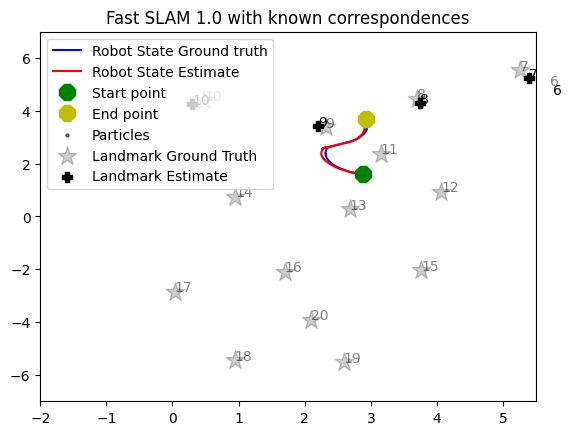

In [7]:
# Initialize Motion Model object
# Motion noise (in meters / rad)
# [noise_x, noise_y, noise_theta, noise_v, noise_w]
# Fisrt three are used for initializing particles
# Last two are used for motion update
motion_noise = np.array([0.0, 0.0, 0.0, 0.1, 0.15])
motion_model = FS_MotionModel(motion_noise)

# Initialize Measurement Model object
# Measurement covariance matrix
Q = np.diagflat(np.array([0.05, 0.02])) ** 2
measurement_model = FS_MeasurementModel(Q)

# Initialize SLAM algorithm
# Number of particles
N_particles = 100

fast_slam = FastSLAM(motion_model, measurement_model)
fast_slam.load_data(dataset, robot, start_frame, end_frame)
fast_slam.initialization(N_particles)

# Run full Fast SLAM 1.0 algorithm
for data in fast_slam.data:
    if (data[1] == -1):
        fast_slam.robot_update(data)
    else:
        fast_slam.landmark_update(data)
    fast_slam.state_update()

fast_slam.plot_data()
plt.show()

**T2.1** The Fast SLAM implementation executed above iteratively executes the functions robot_update(), landmark_update() and state_update(). Could you specify, the goal of each of the functions?

(Answer here max 150 words)

**T2.2** The Fast SLAM algorithm method inputs a measurement_model. Could you describe the model and the purpose of it?

(Answer here max 150 words)

**T2.3** Which is the main assumption of Fast SLAM algorithms?

(Answer here max 150 words)

### T3. Graph SLAM
Review the GraphSLAM() method, execute the Graph SLAM of the next code block, and answer the questions below:

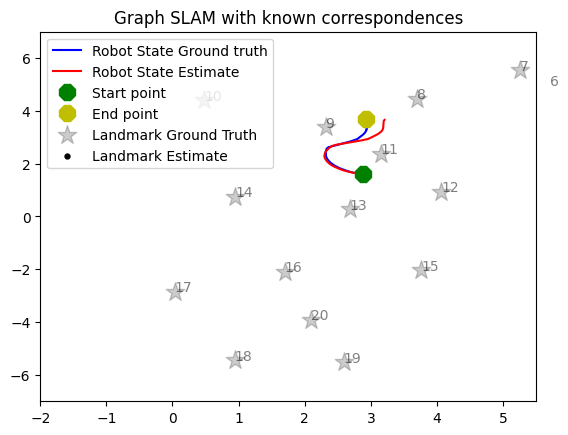

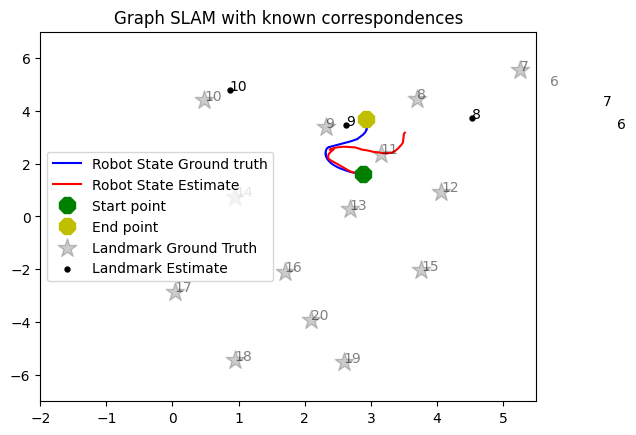

In [8]:
# State covariance matrix
R = np.diagflat(np.array([5, 5, 20])) ** 2
# Measurement covariance matrix
Q = np.diagflat(np.array([100.0, 100.0, 1e16])) ** 2
# Iterations
n = 4

graph_slam = GraphSLAM(dataset, robot, start_frame, end_frame, n, R, Q, plot=True)
plt.show()

**T3.1** Which type of SLAM problem is solving the Graph SLAM method executed above? Online or full? Why and how would you tell from above results?

(Answer here max 150 words)

**T3.2** The main functions of the GraphSLAM() implementation executed above are: motion_update(), linearize(), reduce() and solve(). Justify for each function if you would associate it with the front-end or with the back-end.

(Answer here max 150 words)

**T3.3** The GraphSLAM() implementation executed above shows a very poor performance in terms of computation. How would you improve the efficiency of the implementation?

(Answer here max 150 words)

### T4. Benchmark EKF, Fast and Graph SLAM
Compare the EKF, Fast and Graph SLAM using different datasets. For the comparison use the metrics introducced in previous lab sessions. 

The objective of this task is to be able to determine the SLAM algorithm that provides the best performance for the robot system of the pre-recorded datasets studied. In order to decide which model and configuration works best follow the next steps:
1. Extract the metrics for each dataset and model configuaration.
2. Represent the results in different types of plots that might be relevant for you to extract meaningful conclusions.
3. Conclude the analysis.

#### Extract metrics

#### Represent metrics

#### Analize metrics
**T4.1** Analize the representations, and extract some conclusions regarding the performance of each of SLAM implementation. In case we need to integrate a navigation algorithm based on SLAM to the robots used for recording the datasets, based on the results obtained which method would you use?


(Answer here max 300 words)

**T4.2** Could you list the the three algorithms ordered in terms of robustness? Justify your answer.

(Answer here max 150 words)


**Delivery Instructions:**

1. 📂 Please download your work in both Notebook and Markdown formats. Simply navigate to: 

   - `File` > `Download as` > `Notebook`

   - `File` > `Download as` > `Markdown`
   

2. 🗜 Once you have the necessary files and any associated figures, kindly compress them into a single .zip file. When naming your file, please use the format: **E2_FirstName_LastName.zip**.


3. 📤 Finally, make sure to upload your .zip file to Aula Digital.